# Wing Aerodynamics Analysis using Vortex-Step Method (VSM) and Lift Line Theory (LLT)
This notebook demonstrates the process of setting up and analyzing a wing's aerodynamics using VSM and LLT. We'll cover the following steps:
1. Setting up the environment and importing necessary libraries.
2. Creating a wing object and adding sections.
3. Initializing the aerodynamic models.
4. Solving for aerodynamic properties.
5. Visualizing the results.
6. Verifying the symmetry of the gamma distribution.


In [1]:
# Step 1: Import necessary libraries
import numpy as np
import logging
import os
from pathlib import Path
from copy import deepcopy
from VSM.WingAerodynamics import WingAerodynamics
from VSM.WingGeometry import Wing
from VSM.Solver import Solver
import VSM.plotting as plotting

# Set the log level to INFO
logging.basicConfig(level=logging.INFO)

### Explanation:
In this step, we import the necessary libraries for the aerodynamic analysis. We use:
- `numpy` for numerical operations.
- `logging` for debugging and information logging.
- `os` and `Path` for file path management.
- The `VSM` module for handling wing aerodynamics, geometry, solving, and plotting.
- Set the logging level to INFO
- 
Make sure the `VSM` module is properly installed in your environment.


In [2]:
# Step 3: Create a wing object with specific properties
wing = Wing(n_panels=20, spanwise_panel_distribution="linear")

### Explanation:
Here, we create a `Wing` object with 20 panels and a spanwise panel distribution method specified as "split_provided". The `Wing` object is central to our aerodynamic analysis.


In [3]:
# Step 4: Add sections to the wing
span = 20  # Define the span of the wing

# Add sections: left-to-right, top-to-bottom
wing.add_section([0, span / 2, 0], [1, span / 2, 0], ["inviscid"])
wing.add_section([0, -span / 2, 0], [1, -span / 2, 0], ["inviscid"])

In [4]:
# Step 5: Initialize wing aerodynamics
wing_aero = WingAerodynamics([wing])

In [5]:
# Step 6: Define inflow conditions
Umag = 20  # Magnitude of the inflow velocity
aoa = 30  # Angle of attack in degrees
aoa = np.deg2rad(aoa)  # Convert angle of attack to radians
Uinf = np.array([np.cos(aoa), 0, np.sin(aoa)]) * Umag  # Define the inflow vector

wing_aero.va = Uinf  # Set the inflow conditions
wing_aero_LLT = wing_aero  # Create a copy for the LLT solver

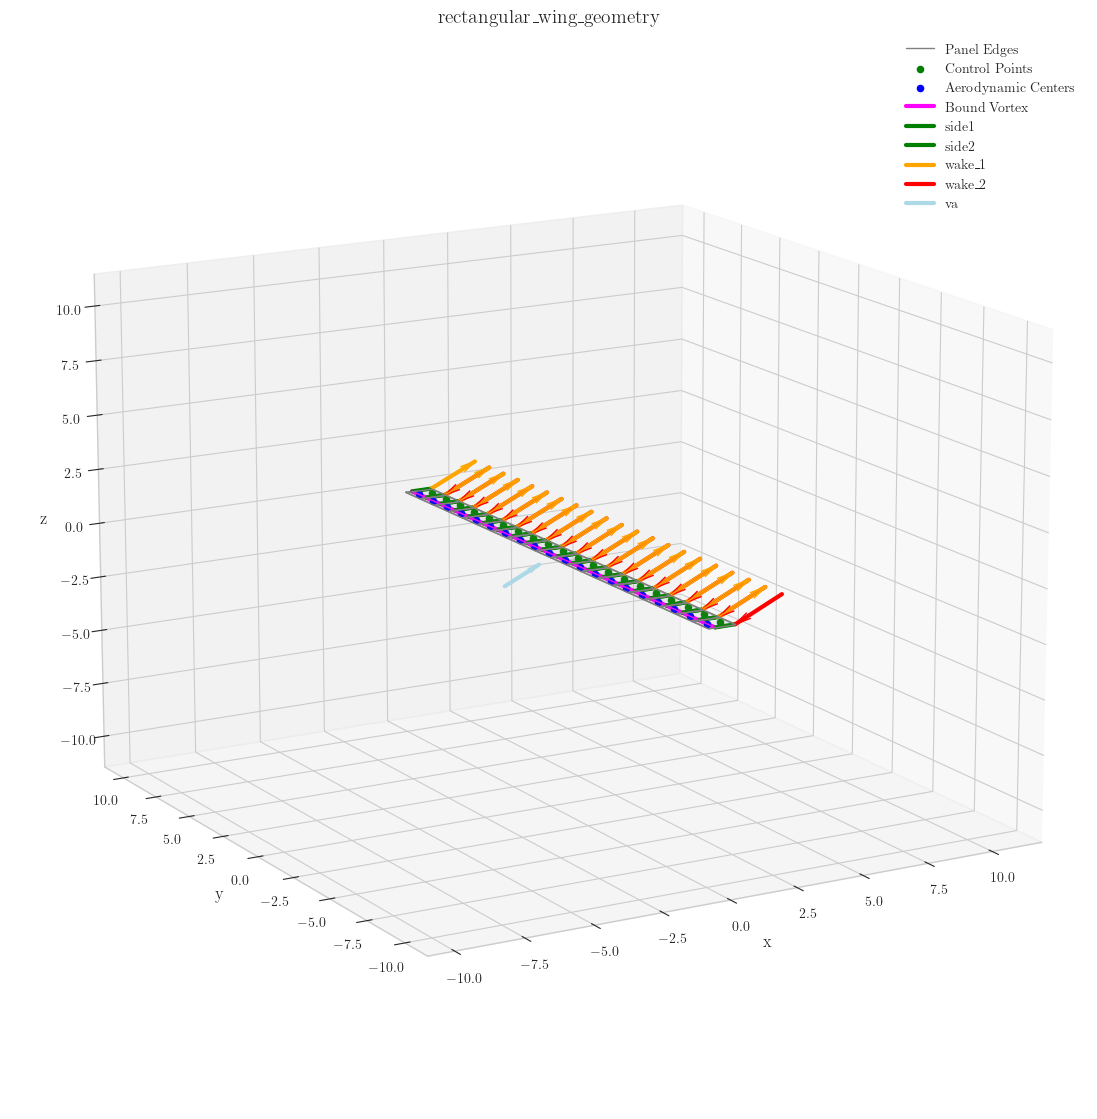

In [6]:
# Step 7: Plot the wing geometry
plotting.plot_geometry(
    wing_aero,
    title="rectangular_wing_geometry",
    data_type=".pdf",
    save_path=".",
    is_save=False,
    is_show=True,
)

**The geometry has been created. It is now time to setup the solver, and provide all the specifics that we would like, options are:**
```
    aerodynamic_model_type (str): Type of aerodynamic model, VSM or LLT
    density (float): = 1.225 | Air density
    max_iterations (int): = 1000 | Maximum number of iterations
    allowed_error (float): = 1e-5 | Allowed error
    tol_reference_error (float): = 0.001 | Reference error
    relaxation_factor (float): = 0.03 | Relaxation factor
    artificial_damping (dict): = {"k2": 0.0, "k4": 0.0} | Artificial damping
    type_initial_gamma_distribution (str): = "elliptic" | Type of initial gamma distribution
    core_radius_fraction (float): = 1e-20 | Core radius fraction
    is_only_f_distribution_output (bool): = False | True when speed is desired and only interest lies in distributed force
```

In [7]:
# Step 8: Initialize solvers for LLT and VSM methods
LLT = Solver(aerodynamic_model_type="LLT")
VSM = Solver(aerodynamic_model_type="VSM")

INFO:root:Converged after 1275 iterations
INFO:root:Converged after 650 iterations
INFO:root:Converged after 586 iterations
INFO:root:Converged after 549 iterations
INFO:root:Converged after 522 iterations
INFO:root:Converged after 502 iterations
INFO:root:Converged after 485 iterations
INFO:root:Converged after 471 iterations
INFO:root:Converged after 458 iterations
INFO:root:Converged after 447 iterations
INFO:root:Converged after 438 iterations
INFO:root:Converged after 429 iterations
INFO:root:Converged after 421 iterations
INFO:root:Converged after 413 iterations
INFO:root:Converged after 407 iterations
INFO:root:Converged after 400 iterations
INFO:root:Converged after 394 iterations
INFO:root:Converged after 389 iterations
INFO:root:Converged after 383 iterations
INFO:root:Converged after 378 iterations
INFO:root:Converged after 1265 iterations
INFO:root:Converged after 646 iterations
INFO:root:Converged after 583 iterations
INFO:root:Converged after 546 iterations
INFO:root:Conv

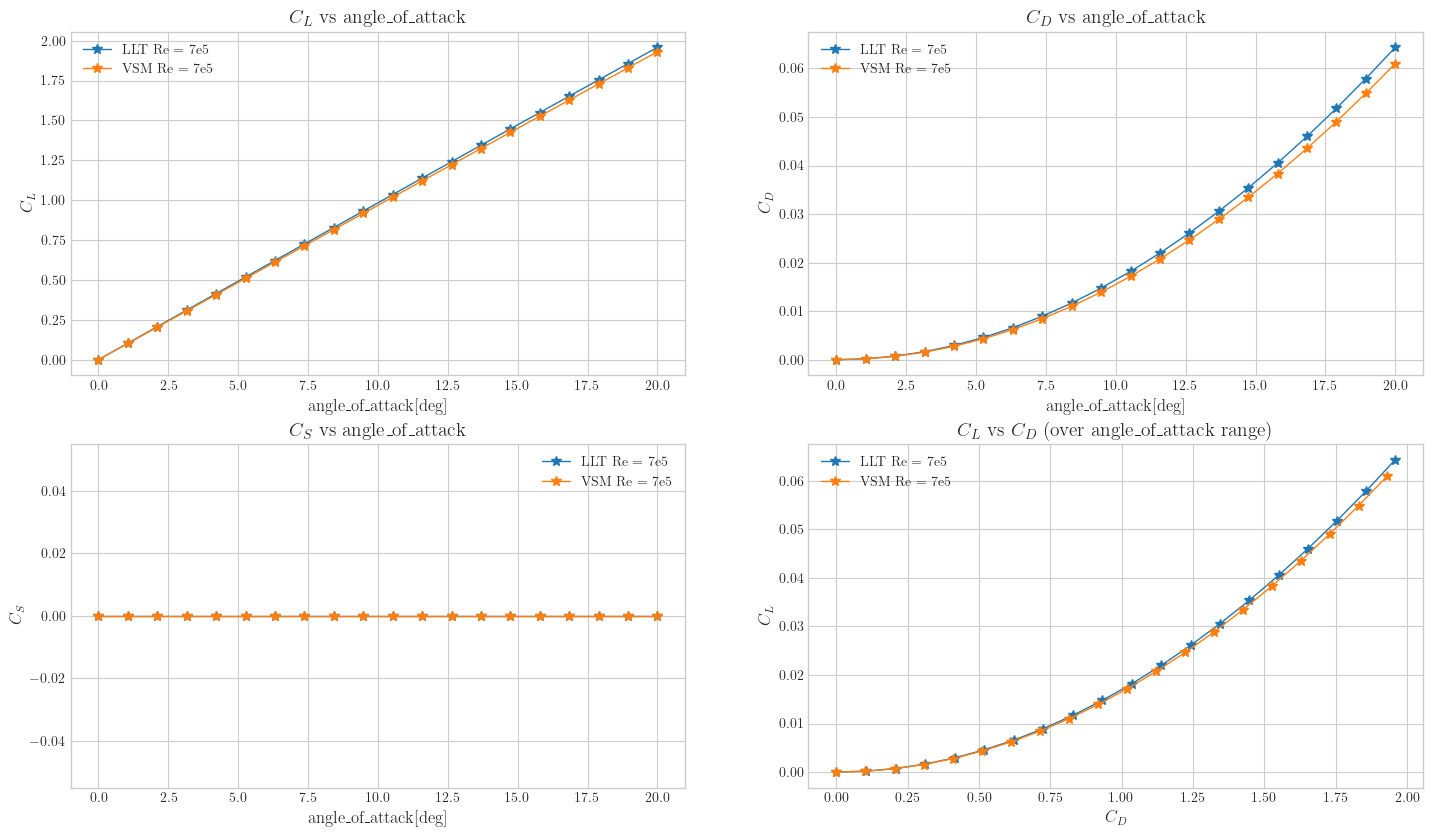

In [8]:
# Step 9: Plot the polars
plotting.plot_polars(
    solver_list=[LLT, VSM],
    wing_aero_list=[wing_aero, wing_aero],
    label_list=["LLT", "VSM"],
    literature_path_list=[],
    angle_range=np.linspace(0, 20, 20),
    angle_type="angle_of_attack",
    angle_of_attack=0,
    side_slip=0,
    yaw_rate=0,
    Umag=10,
    title="rectangular_wing_polars",
    data_type=".pdf",
    save_path=".",
    is_save=False,
    is_show=True,
)

INFO:root:Converged after 637 iterations
INFO:root:Converged after 641 iterations


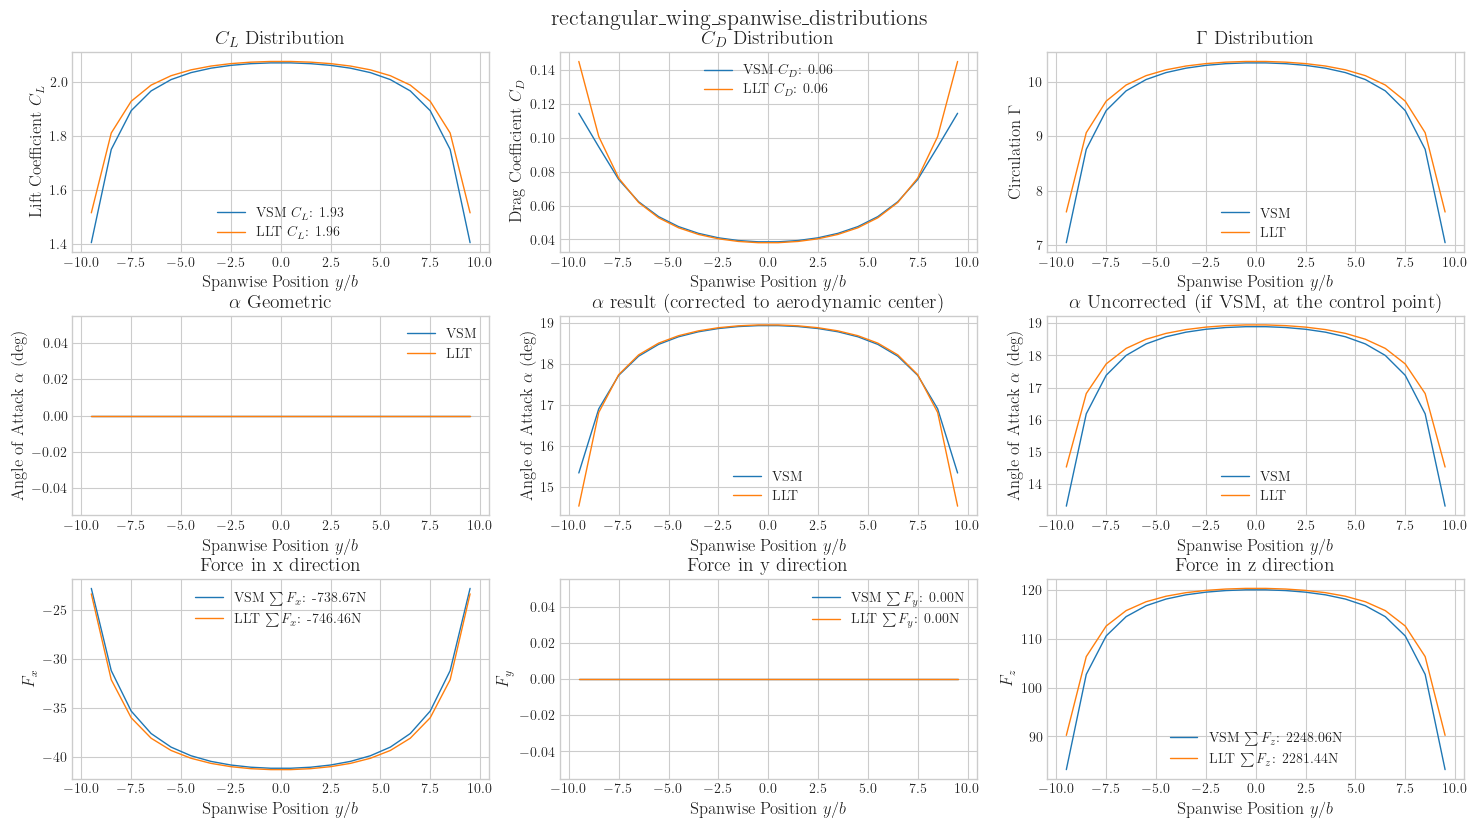

In [9]:
# Step 10: Solve the aerodynamics using VSM and LLT
results_VSM = VSM.solve(wing_aero)
results_LLT = LLT.solve(wing_aero_LLT)

# Step 11: Plot the distribution
y_coordinates = [panels.aerodynamic_center[1] for panels in wing_aero.panels]
plotting.plot_distribution(
    y_coordinates_list=[y_coordinates, y_coordinates],
    results_list=[results_VSM, results_LLT],
    label_list=["VSM", "LLT"],
    title="rectangular_wing_spanwise_distributions",
    data_type=".pdf",
    save_path=".",
    is_save=False,
    is_show=True,
)

In [10]:
# Step 10: Check if the gamma distribution is symmetric
def is_symmetric_1d(array, tol=1e-8):
    return np.allclose(array, array[::-1], atol=tol)


print(f"VSM is symmetric: {is_symmetric_1d(results_VSM['gamma_distribution'])}")
print(f"LLT is symmetric: {is_symmetric_1d(results_LLT['gamma_distribution'])}")

VSM is symmetric: True
LLT is symmetric: True
